In [ ]:
!pip install pandas geopandas matplotlib contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 33.9 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load the data
df = pd.read_csv('data.csv')

# Display the first few rows of the dataframe
df.head()

,Waypoint_Id,Waypoint_D,Waypoint_T,Dates,DayOfWeek,X,Y,Category,Block_Numb
0,3,12/03/2022,8:09:30 am,12/03/2022 08:09,Saturday,30.508975,0.826218,Tree Products,N13
1,6,01/02/2022,6:33:42 am,01/02/2022 06:33,Tuesday,30.470343,0.851642,Tree Products,N3
2,16,13/12/2021,7:43:28 am,13/12/2021 07:43,Monday,30.472492,0.831228,Tree Products,N6
3,3,17/01/2022,12:21:29 pm,17/01/2022 12:21,Monday,30.466258,0.759150,Tree Products,S9
4,2,10/02/2022,6:39:50 am,10/02/2022 06:39,Thursday,30.467877,0.848830,Encroachment,N3


In [ ]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['X'], df['Y']))

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Display the first few rows of the GeoDataFrame
gdf.head()

,Waypoint_Id,Waypoint_D,Waypoint_T,Dates,DayOfWeek,X,Y,Category,Block_Numb,geometry
0,3,12/03/2022,8:09:30 am,12/03/2022 08:09,Saturday,30.508975,0.826218,Tree Products,N13,POINT (30.50897 0.82622)
1,6,01/02/2022,6:33:42 am,01/02/2022 06:33,Tuesday,30.470343,0.851642,Tree Products,N3,POINT (30.47034 0.85164)
2,16,13/12/2021,7:43:28 am,13/12/2021 07:43,Monday,30.472492,0.831228,Tree Products,N6,POINT (30.47249 0.83123)
3,3,17/01/2022,12:21:29 pm,17/01/2022 12:21,Monday,30.466258,0.759150,Tree Products,S9,POINT (30.46626 0.75915)
4,2,10/02/2022,6:39:50 am,10/02/2022 06:39,Thursday,30.467877,0.848830,Encroachment,N3,POINT (30.46788 0.84883)


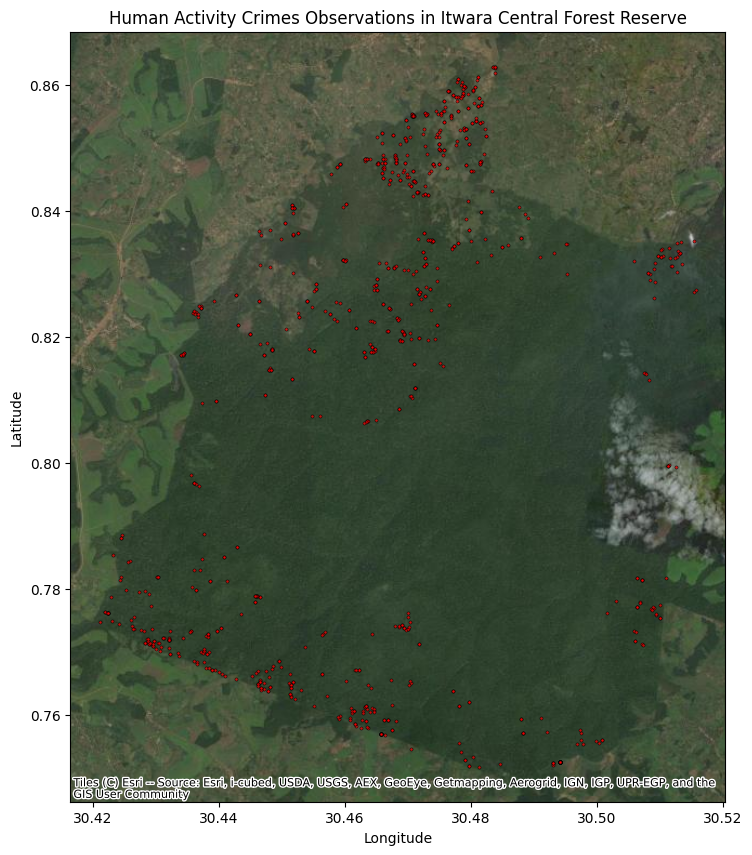

In [ ]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='red', markersize=5, alpha=0.7, edgecolor='k', linewidth=0.5)

# Add a basemap (satellite imagery)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

# Set axis titles and labels
ax.set_title('Human Activity Crimes Observations in Itwara Central Forest Reserve')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [ ]:
# Export the GeoDataFrame to a CSV file
output_csv = 'Itwara_data.csv'
gdf.to_csv(output_csv)

In [ ]:
# Download the CSV file
files.download(output_csv)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import folium
# Create a map centered around the approximate center of Itwara Central Forest Reserve
map_center = [df['Y'].mean(), df['X'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Add points to the map
for idx, row in df.iterrows():
    popup_text = row['Category'] if 'Category' in df.columns else 'N/A'
    # Removed extra indent here
    folium.CircleMarker(
        location=[row['Y'], row['X']],
        radius=5,
        popup=popup_text,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

# Save the map to an HTML file
m.save('itwara_map.html')

# Display the map
m